In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [5]:
data = pd.read_csv("data_for_lr.csv")
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [9]:
data.isnull().sum()

x    0
y    1
dtype: int64

Data Processing

In [19]:
data = data.dropna()

In [21]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [27]:
print("Shape of the data", data.shape)

Shape of the data (699, 2)


Spliting Data

In [37]:
# Training input and output
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500,1)

In [33]:
train_input

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [35]:
train_output

array([[ 21.54945196],
       [ 47.46446305],
       [ 17.21865634],
       [ 36.58639803],
       [ 87.28898389],
       [ 32.46387493],
       [ 10.78089683],
       [ 80.7633986 ],
       [ 24.61215147],
       [  6.96331907],
       [ 11.23757338],
       [ 13.53290206],
       [ 24.60323899],
       [ 39.40049976],
       [ 48.43753838],
       [ 61.69900319],
       [ 26.92832418],
       [ 70.4052055 ],
       [ 29.34092408],
       [ 25.30895192],
       [ 69.02934339],
       [ 84.99484703],
       [ 57.04310305],
       [ 50.5921991 ],
       [ 83.02772202],
       [ 57.05752706],
       [ 47.95883341],
       [ 24.34226432],
       [ 94.68488281],
       [ 48.03970696],
       [  7.08132338],
       [ 21.99239907],
       [ 42.33151664],
       [  0.32908944],
       [ 61.92303698],
       [ 91.17716423],
       [ 39.45358014],
       [  5.99606961],
       [ 22.59015942],
       [ 61.18044414],
       [ 85.02778957],
       [ -1.28631089],
       [ 61.94273962],
       [ 21

In [41]:
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [43]:
test_input

array([[  5.],
       [ 61.],
       [ 47.],
       [ 98.],
       [ 30.],
       [ 63.],
       [  0.],
       [100.],
       [ 18.],
       [ 30.],
       [ 98.],
       [ 16.],
       [ 22.],
       [ 55.],
       [ 43.],
       [ 75.],
       [ 91.],
       [ 46.],
       [ 85.],
       [ 55.],
       [ 36.],
       [ 49.],
       [ 94.],
       [ 43.],
       [ 22.],
       [ 37.],
       [ 24.],
       [ 95.],
       [ 61.],
       [ 75.],
       [ 68.],
       [ 58.],
       [  5.],
       [ 53.],
       [ 80.],
       [ 83.],
       [ 25.],
       [ 34.],
       [ 26.],
       [ 90.],
       [ 60.],
       [ 49.],
       [ 19.],
       [ 92.],
       [ 29.],
       [  8.],
       [ 57.],
       [ 29.],
       [ 19.],
       [ 81.],
       [ 50.],
       [ 15.],
       [ 70.],
       [ 39.],
       [ 43.],
       [ 21.],
       [ 98.],
       [ 86.],
       [ 16.],
       [ 25.],
       [ 31.],
       [ 93.],
       [ 67.],
       [ 49.],
       [ 25.],
       [ 88.],
       [ 5

In [45]:
test_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

In [47]:
print(f"Training input data = {train_input.shape}")
print(f"Training output data = {train_output.shape}")
print(f"Testing input data = {test_input.shape}")
print(f"Testing output data = {test_output.shape}")

Training input data = (500, 1)
Training output data = (500, 1)
Testing input data = (199, 1)
Testing output data = (199, 1)


Linear Regression

Forward Propagation

f(x)= mx +c

In [74]:
def forwardforward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']

    prediction = np.multiply(m, train_input) + c
    return prediction

Cost Function

Summation (f(x)-y)^2 / 2n

In [69]:
def cost_function(prediction, train_output):
    cost = np.mean((train_output - prediction) ** 2) * 0.5
    return cost

Gradient Descent for backward propagation

In [128]:
def backward_propagation(train_input, train_output, prediction):
    derivative = dict()

    df = prediction - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivative['dm'] = dm
    derivative['dc'] = dc

    return derivative

update paframeters

In [143]:
def update_parameter(parameters, derivative, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivative['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivative['dc']

    return parameters

Model Training

In [219]:
def train(train_input, train_output, learning_rate, iteration):
    # random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    loss = list()

    for i in range(iteration):
        prediction = forwardforward_propagation(train_input, parameters)

        cost = cost_function(prediction, train_output)

        loss.append(cost)
        print(f"Iteration = {i+1} , Loss = {cost}")

        ax = plt.subplot()

        ax.plot(train_input, train_output, "+", label="Original")
        ax.plot(train_input, prediction, "*", label="Training")

        ax.legend()

        plt.plot(train_input, train_output, "*", label="Original")
        plt.plot(train_input, prediction, "+", label="Original")
        plt.show()
        
        derivative = backward_propagation(train_input, train_output, prediction)

        parameters = update_parameter(parameters, derivative, learning_rate)

    return parameters, loss

Training

Iteration = 1 , Loss = 1323.323957642234


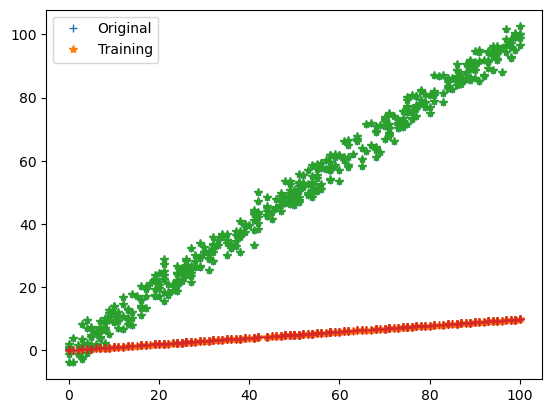

Iteration = 2 , Loss = 602.5340765872498


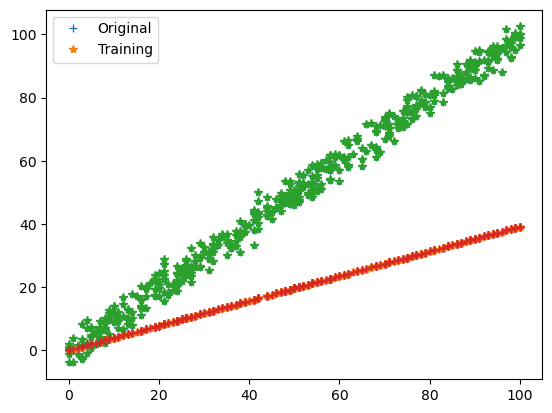

Iteration = 3 , Loss = 275.5109089591305


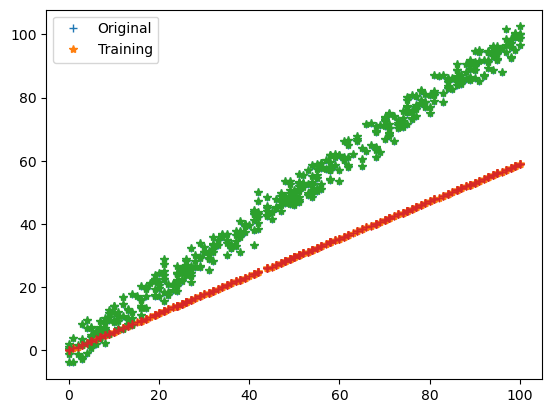

Iteration = 4 , Loss = 127.14013536503114


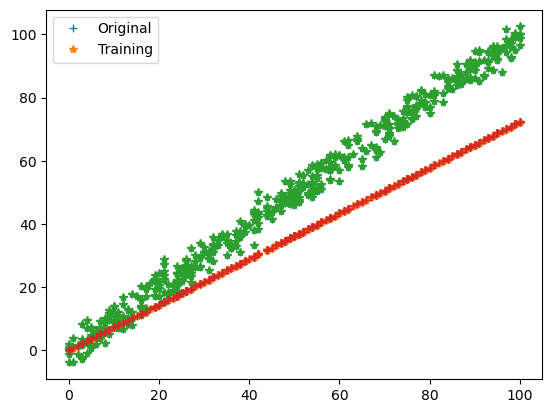

Iteration = 5 , Loss = 59.82415082693237


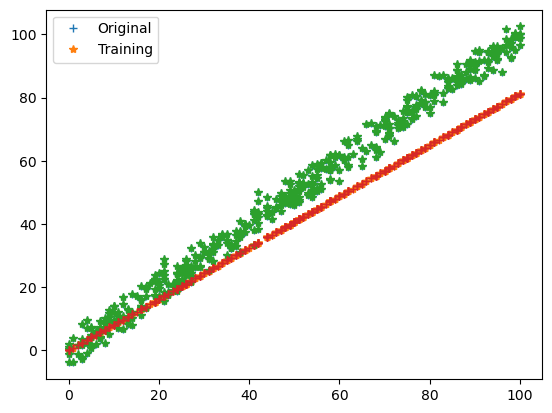

Iteration = 6 , Loss = 29.28281386317681


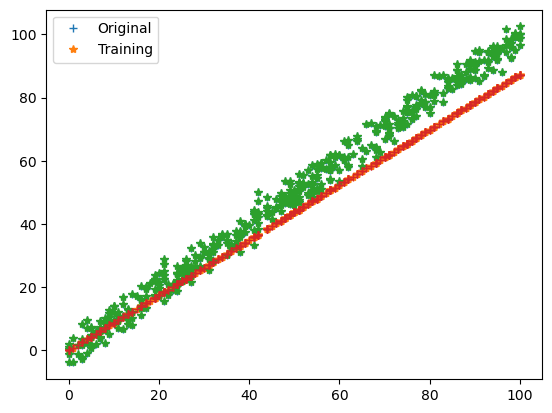

Iteration = 7 , Loss = 15.426175237027003


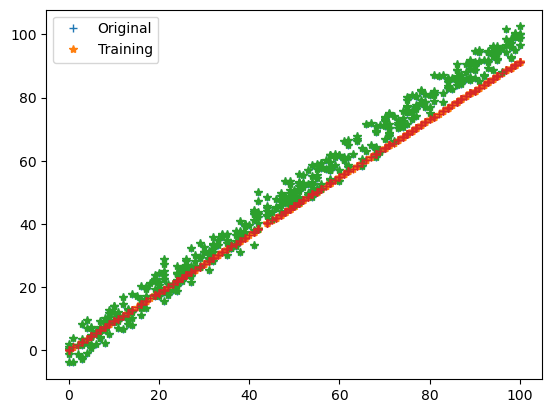

Iteration = 8 , Loss = 9.139402727319368


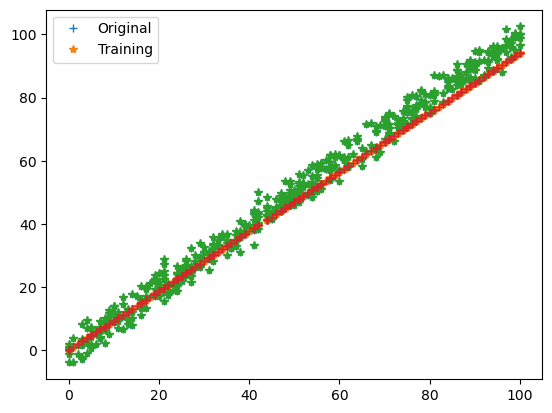

Iteration = 9 , Loss = 6.287086859348208


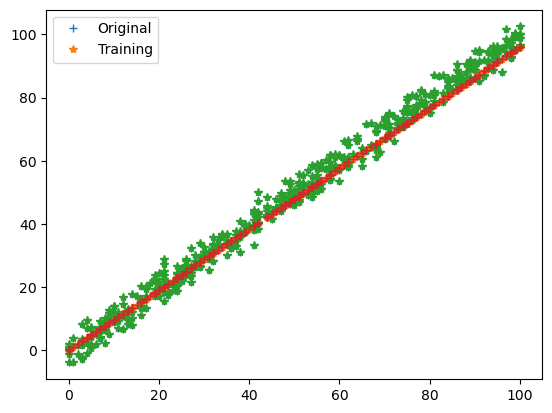

Iteration = 10 , Loss = 4.992987773889479


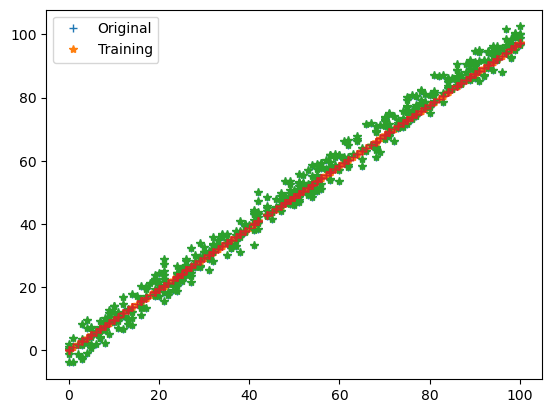

Iteration = 11 , Loss = 4.405853368612722


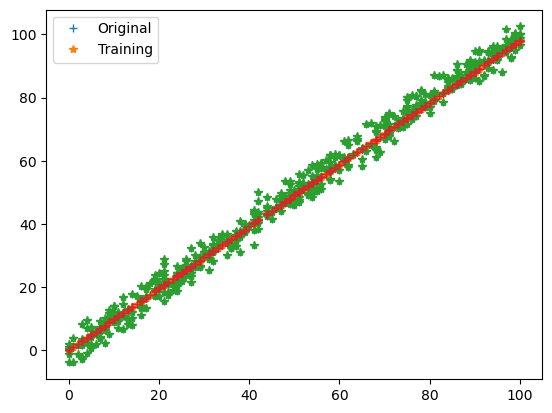

Iteration = 12 , Loss = 4.139469621808659


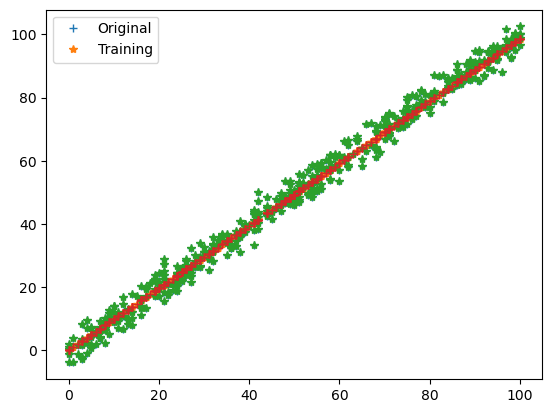

Iteration = 13 , Loss = 4.018610804041223


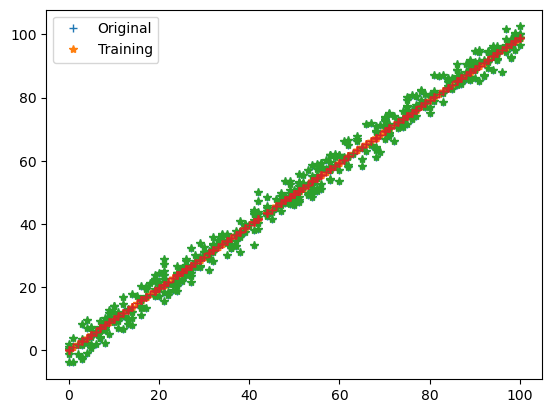

Iteration = 14 , Loss = 3.963776807778035


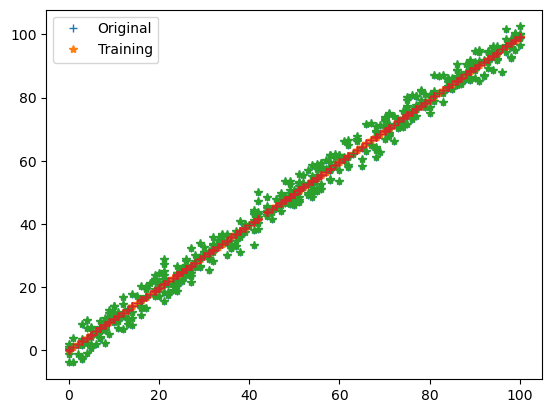

Iteration = 15 , Loss = 3.9388983461740583


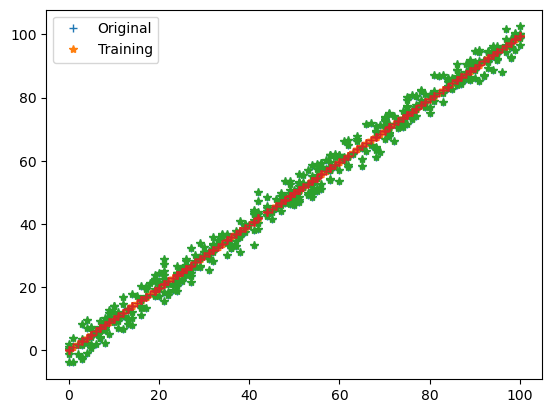

Iteration = 16 , Loss = 3.9276107438358685


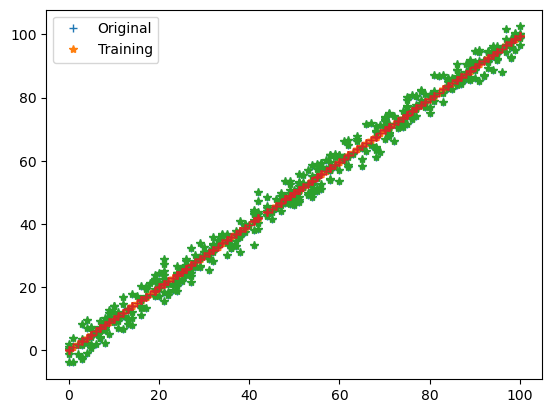

Iteration = 17 , Loss = 3.9224893294112806


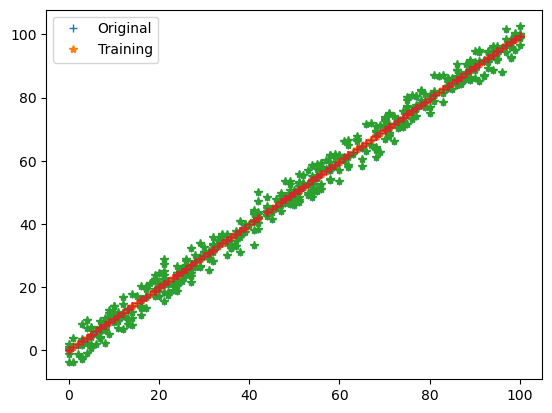

Iteration = 18 , Loss = 3.920165521283937


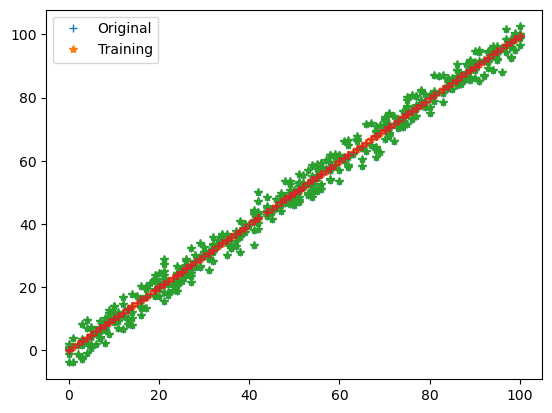

Iteration = 19 , Loss = 3.9191109902433134


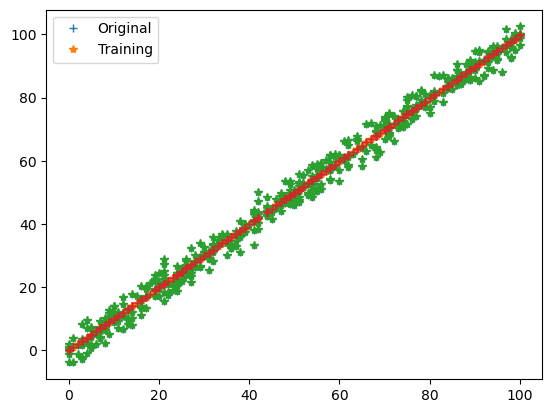

Iteration = 20 , Loss = 3.9186323316337557


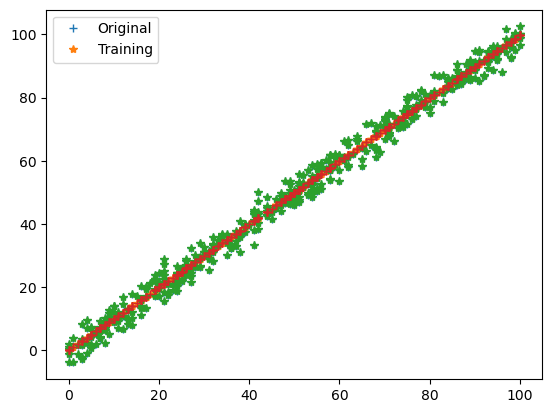

In [224]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [228]:
parameters

{'m': 0.9968813247748544, 'c': 0.013987319176507257}

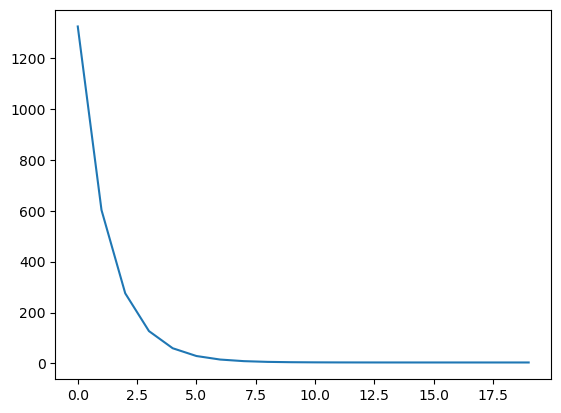

In [230]:
plt.plot(loss)

Prediction

In [232]:
test_prediction = test_input * parameters['m'] + parameters['c']

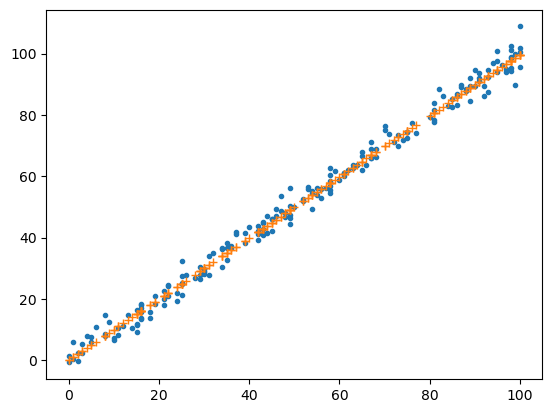

In [236]:
plt.plot(test_input, test_output, ".")
plt.plot(test_input, test_prediction, "+")
plt.show()

Cost of prediction

In [239]:
cost_function(test_prediction, test_output)

4.0016923828856905

Done!!